## Viewing the file using Dask

In [2]:
import pandas as pd
file_path='Encounters.csv'


In [62]:
import datetime as dt

In [10]:
import dask.dataframe as dd
df = dd.read_csv(file_path)


In [76]:
df.columns

Index(['PATIENT_ID', 'PROVIDER_IDS', 'PROVIDER_TYPES', 'CARE_SETTING_CATEGORY',
       'ADMIT_DATE', 'DISCHARGE_DATE', 'DISCHARGE_DISPOSITION',
       'OVERDOSE_FLAG', 'OD_DX_DATE', 'OD_NOTE_DATE', 'OD_TERMS',
       'OD_DRUG_TERMS', 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG',
       'ADVERSE_OPIOID_EVENT_DRUGS', 'ADVERSE_OPIOID_EVENT_PROBLEMS',
       'COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'],
      dtype='object')

## df is the data frame containing all the data present in the CSV file and below we can see the various columns and datatypes of each column.

In [11]:
df.head()

C:\Anaconda3\lib\site-packages\dask\local.py:252: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


,PATIENT_ID,PROVIDER_IDS,PROVIDER_TYPES,CARE_SETTING_CATEGORY,ADMIT_DATE,DISCHARGE_DATE,DISCHARGE_DISPOSITION,OVERDOSE_FLAG,OD_DX_DATE,OD_NOTE_DATE,...,OTHERGOV_FLAG,SELFPAY_FLAG,WORKERSCOMP_FLAG,INSTITUTIONALIZED_FLAG,CHARITY_FLAG,MEDICARE_FLAG,MEDICAID_FLAG,LIFE_FLAG,MDWISE_FLAG,NODATA_FLAG
0,591002,NaN,NaN,E,2010-03-08,2010-03-09,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,591002,NaN,NaN,E,2010-03-08,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,591002,NaN,NaN,E,2010-03-12,2010-03-13,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,591002,NaN,NaN,E,2010-03-12,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,591002,NaN,NaN,E,2010-12-28,2010-12-30,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [21]:
df.head(500)

,PATIENT_ID,PROVIDER_IDS,PROVIDER_TYPES,CARE_SETTING_CATEGORY,ADMIT_DATE,DISCHARGE_DATE,DISCHARGE_DISPOSITION,OVERDOSE_FLAG,OD_DX_DATE,OD_NOTE_DATE,...,OTHERGOV_FLAG,SELFPAY_FLAG,WORKERSCOMP_FLAG,INSTITUTIONALIZED_FLAG,CHARITY_FLAG,MEDICARE_FLAG,MEDICAID_FLAG,LIFE_FLAG,MDWISE_FLAG,NODATA_FLAG
0,591002,NaN,NaN,E,2010-03-08,2010-03-09,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,591002,NaN,NaN,E,2010-03-08,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,591002,NaN,NaN,E,2010-03-12,2010-03-13,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,591002,NaN,NaN,E,2010-03-12,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,591002,NaN,NaN,E,2010-12-28,2010-12-30,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
5,591002,NaN,NaN,E,2010-12-28,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
6,591002,NaN,NaN,E,2011-01-29,2011-01-31,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
7,591002,NaN,NaN,E,2011-01-29,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
8,591002,NaN,NaN,E,2011-03-22,2011-03-22,NaN,0,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
9,591002,NaN,NaN,E,2011-03-22,NaN,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


## Counting the number of visits of Patients based on Admit_Date and Discharge Date

In [4]:
import pandas as pd 
j=[]
file_path='Encounters.csv'
chunksize=30000
d={}
for chunk in pd.read_csv(file_path, low_memory=False, iterator=True, chunksize=chunksize):
    a = chunk[['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID']]
    b = a[(a['ADMIT_DATE'].notnull()) & (a['ADMIT_DATE']>="2014-10-01") & (a['DISCHARGE_DATE'].notnull()) & (a['DISCHARGE_DATE']>="2014-10-01")].groupby('PATIENT_ID').count()
    b.reset_index(inplace=True)
    b = b.rename(columns = {'index':'PATIENT_ID'})
    j.extend(b.values)



In [5]:
len(j)

561663

### NEW TASK

In [1]:
import pandas as pd 
j=[]
file_path='Encounters.csv'
chunksize=30000
d={}
for chunk in pd.read_csv(file_path, low_memory=False, iterator=True, chunksize=chunksize):
    a = chunk[['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID','CARE_SETTING_CATEGORY']]
    b = a[(a['ADMIT_DATE'].notnull()) & (a['ADMIT_DATE']>="2014-10-01") & (a['DISCHARGE_DATE'].notnull()) & (a['DISCHARGE_DATE']>="2014-10-01") & ((a['CARE_SETTING_CATEGORY']=='E')|(a['CARE_SETTING_CATEGORY']=='I'))]
    #b.reset_index(inplace=True)
    j.extend(b.values)



In [103]:
#c=b.drop(['index'],axis=1)

In [2]:
df_new = pd.DataFrame(j, columns=['ADMIT_DATE', 'DISCHARGE_DATE', 'PATIENT_ID','CARE_SETTING_CATEGORY'])

In [3]:
df_new_uniq = pd.DataFrame.drop_duplicates(df_new)

In [4]:
df_new.shape

(2399697, 4)

In [5]:
df_new_uniq.shape

(2161572, 4)

In [6]:
df_new_sort=df_new_uniq.sort_values(['PATIENT_ID', 'ADMIT_DATE', 'DISCHARGE_DATE'])[['PATIENT_ID', 'ADMIT_DATE', 'DISCHARGE_DATE','CARE_SETTING_CATEGORY']]

In [7]:
df_new_sort=df_new_sort.drop('DISCHARGE_DATE',axis=1)

In [8]:
#df_new_sort.dtypes
df_new_sort['ADMIT_DATE'] =  pd.to_datetime(df_new_sort['ADMIT_DATE'])

In [9]:
df_new_sort['grp_date'] = df_new_sort.ADMIT_DATE.diff().dt.days.ne(1).cumsum()

In [11]:
df_new_sort.head(300)

,PATIENT_ID,ADMIT_DATE,CARE_SETTING_CATEGORY,grp_date
365631,1,2017-11-03,E,1
365632,1,2018-02-15,E,2
217869,3,2017-08-18,E,3
217871,3,2017-08-20,I,4
217870,3,2018-02-10,E,5
1895224,9,2017-02-28,I,6
1895223,9,2018-09-05,E,7
822503,10,2016-09-21,I,8
822501,10,2018-05-30,E,9
822502,10,2018-09-06,E,10


In [77]:
df_new_sort[df_new_sort['ADMIT_DATE']=='2017-11-03']

,PATIENT_ID,ADMIT_DATE,CARE_SETTING_CATEGORY,grp_date
365631,1,2017-11-03,E,1
1908937,27,2017-11-03,E,48
688276,704,2017-11-03,E,1965
1257607,1137,2017-11-03,E,3147
1257609,1137,2017-11-03,I,3148
892351,1141,2017-11-03,E,3173
341230,1298,2017-11-03,E,3748
2116855,1421,2017-11-03,E,4103
1957173,2436,2017-11-03,I,6804
1270395,3110,2017-11-03,E,8919


In [78]:
df_new_sort = df_new_sort.drop_duplicates(subset=['grp_date'])

In [79]:
df_new_sort

,PATIENT_ID,ADMIT_DATE,CARE_SETTING_CATEGORY,grp_date
365631,1,2017-11-03,E,1
365632,1,2018-02-15,E,2
217869,3,2017-08-18,E,3
217871,3,2017-08-20,I,4
217870,3,2018-02-10,E,5
1895224,9,2017-02-28,I,6
1895223,9,2018-09-05,E,7
822503,10,2016-09-21,I,8
822501,10,2018-05-30,E,9
822502,10,2018-09-06,E,10


## Total Number of patients=561663

In [ ]:
dfObj.shape

## Took only 3 columns for initial vizualisation

In [8]:
dfObj.head(2093)

,PATIENT_ID,ADMIT_DATE,DISCHARGE_DATE
0,8213,56,56
1,11179,85,85
2,13611,41,41
3,22816,160,160
4,23543,6,6
5,23994,60,60
6,24117,1,1
7,28194,8,8
8,28440,63,63
9,36075,63,63


## A basic histogram plot showing the number of visits for patients according to index in the data frame

In [9]:
dfObj.iloc[:10,1].plot.bar()

## Maximum number of visits by any patient

In [10]:
dfObj['ADMIT_DATE'].max()

1681

## Minimum Number of Visits by any patient

In [11]:
dfObj['ADMIT_DATE'].min()

1

## Patient id having maximum number of visits --480347

In [12]:
dfObj.loc[dfObj['ADMIT_DATE'] == 247, 'PATIENT_ID']

116       343416
30421     437423
50602     361500
68053     320903
120883    453559
142869    146437
172094    381224
184267     84190
235032     44048
321838    293071
Name: PATIENT_ID, dtype: int64

## Patient_id and number of visits

In [13]:
dfObj.groupby(['PATIENT_ID']).sum()

,ADMIT_DATE,DISCHARGE_DATE
PATIENT_ID,,
1,2,2
2,6,6
3,49,49
5,14,14
7,18,18
9,28,28
10,16,16
11,3,3
12,4,4


## Average number of visits by patients overall

In [14]:
dfObj['ADMIT_DATE'].mean()

24.919820248084704

In [15]:
dfObj['ADMIT_DATE'].std()

29.28767959148354

## Median number of visits by patients overall

In [16]:
dfObj['ADMIT_DATE'].median()

16.0

## Histogram Plot for 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C13C325198>]],
      dtype=object)

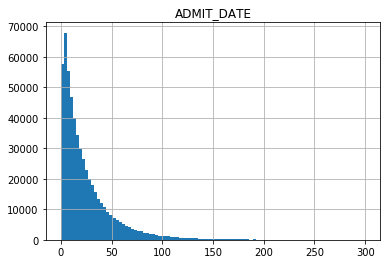

In [17]:
dfObj.hist(column='ADMIT_DATE', bins=100, range=(0, 300))

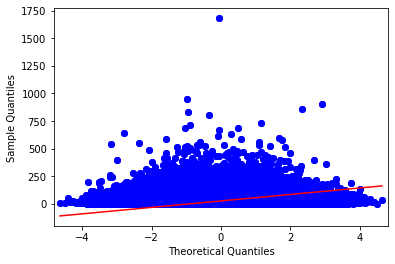

In [18]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = dfObj.groupby(['PATIENT_ID']).sum()
# q-q plot
qqplot(data, line='s')
pyplot.show()

## Patient_id with visits more than mean

In [19]:
dfObj.loc[dfObj['ADMIT_DATE'] > dfObj['ADMIT_DATE'].mean(), 'PATIENT_ID']

0           8213
1          11179
2          13611
3          22816
5          23994
8          28440
9          36075
10         38710
11         42214
12         45059
13         45595
15         48676
17         52615
19         56079
20         58167
21         58671
22         61767
23         68456
24         69365
25         70585
26         73560
27         82506
28         85135
29         85529
31         87803
33         93489
34        102118
35        114644
36        115942
38        118339
           ...  
561347    543598
561365    549222
561367    550205
561368    550666
561372    552996
561381    558488
561384    558899
561399    564233
561400    564834
561420    573051
561429    576494
561441    582635
561442    582995
561451    585866
561467    590834
561484    598747
561497    603654
561500    606381
561512    610015
561537    619666
561596    638038
561604    641035
561616    645050
561622    646919
561627    650542
561631    651545
561643    656554
561645    6566

## Count Patients with visits more than mean ---- 210253

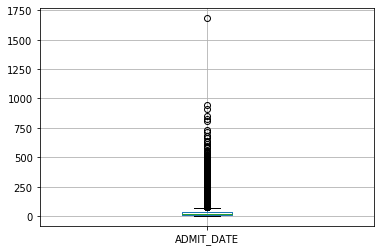

In [20]:
dfObj.boxplot(column=['ADMIT_DATE'])

Visualize Outliers using Box Plot

In [44]:
import seaborn as sns
import numpy as np
from scipy import stats

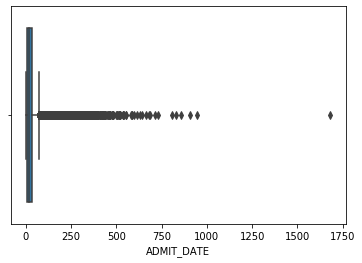

In [22]:
sns.boxplot(x=dfObj['ADMIT_DATE'])

## Z-score

re-scale and center(Normalize) the data and look for data points which are too far from zero(center)
Data far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e
if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [23]:
z=np.abs(stats.zscore(dfObj))
print(z)

[[1.68864157 1.06120416 1.06120416]
 [1.67314513 2.0513825  2.0513825 ]
 [1.66043868 0.54904295 0.54904295]
 ...
 [1.73025552 0.78257619 0.78257619]
 [1.73097653 0.81672027 0.81672027]
 [1.73120119 0.5777117  0.5777117 ]]


In [24]:
import numpy as np
k=np.where(z > 3)

The first array contains the list of row numbers and second array respective column numbers of the outliers. Hence, first array gives the list of patient_id identified as outliers in terms of visits to hospital

## Count Number of Outliers ---- 10610

In [25]:
## Remove Duplicates

k1=k[0]

l1=set(k1)
len(l1)

10610

## Patient_id which are outliers

In [101]:
print(l1)

{327683, 5, 32777, 14, 163854, 327696, 524306, 98323, 229396, 360474, 98337, 65570, 262185, 32811, 557100, 45, 65581, 32816, 426032, 32819, 52, 32825, 131130, 524349, 62, 262206, 393280, 73, 74, 32843, 79, 262228, 557141, 86, 327767, 426072, 89, 99, 426086, 103, 105, 108, 131182, 111, 295024, 393328, 115, 116, 131189, 98422, 163956, 229491, 123, 557184, 131207, 136, 131208, 140, 98449, 32914, 426129, 426131, 458898, 153, 65692, 589987, 164, 32933, 229541, 168, 173, 131246, 164015, 98480, 360623, 524462, 186, 131259, 327867, 65725, 458942, 458943, 65731, 393415, 262346, 204, 208, 164057, 590042, 32990, 65767, 33000, 98537, 33002, 393449, 238, 65775, 327921, 426227, 244, 245, 33016, 65784, 196859, 33020, 327931, 262401, 295170, 264, 266, 131339, 164108, 196879, 393488, 557328, 65810, 262418, 33046, 98582, 196887, 33051, 426267, 164126, 289, 164132, 294, 360744, 229677, 65841, 164146, 393526, 33083, 317, 164157, 320, 328003, 329, 196950, 196954, 351, 65887, 353, 362, 33130, 98669, 366, 37

In [102]:
## Overall description

In [26]:
k1=dfObj['ADMIT_DATE'].describe()
k1=pd.DataFrame(k1)
k1.rename(columns={"ADMIT_DATE": "Count"})

,Count
count,561663.00000
mean,24.91982
std,29.28768
min,1.00000
25%,6.00000
50%,16.00000
75%,33.00000
max,1681.00000


In [27]:
'PATIENT_ID', 'PROVIDER_IDS', 'PROVIDER_TYPES', 'CARE_SETTING_CATEGORY',
       'ADMIT_DATE', 'DISCHARGE_DATE', 'DISCHARGE_DISPOSITION',
       'OVERDOSE_FLAG', 'OD_DX_DATE', 'OD_NOTE_DATE', 'OD_TERMS',
       'OD_DRUG_TERMS', 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG',
       'ADVERSE_OPIOID_EVENT_DRUGS', 'ADVERSE_OPIOID_EVENT_PROBLEMS',
       'COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'

IndentationError: unexpected indent (<ipython-input-27-db81b9eb0019>, line 2)

In [ ]:
## take sum --- 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG'

In [4]:
import pandas as pd
df_combined= pd.read_csv(file_path, usecols=['OD_AR_FLAG','ADVERSE_OPIOID_EVENT_FLAG'])


In [6]:
df_combined.head(5)----take only for 0's and 1..ignore NaN

,OD_AR_FLAG,ADVERSE_OPIOID_EVENT_FLAG
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [ ]:
## take sum --- 'OD_AR_FLAG', 'ADVERSE_OPIOID_EVENT_FLAG'

In [3]:
import pandas as pd 
j1=[]
file_path='Encounters.csv'
chunksize=30000
d={}


In [34]:
import pandas as pd
df_prov= pd.read_csv(file_path, usecols=['PROVIDER_TYPES'])


In [10]:
import pandas as pd
import pandas_profiling
import numpy as np

## Explaination of PROVIDER_TYPES

In [15]:
df_prov.PROVIDER_TYPES.unique()

array([nan, 'NA|NA|NA|NA', 'NA|NA|NA|NA|NA|NA|NA', ...,
       'PHYS THERAPY|RHEUMATOLOGY|RHEUMATOLOGY',
       'NA|NA|MEDICINE|INFECTIOUS D|INFECTIOUS D|INFECTIOUS DISE|NA',
       'Allopathic & Osteopathic Physicians : Internal Medicine : Cardiovascular Disease|Allopathic & Osteopathic Physicians : Internal Medicine|Allopathic & Osteopathic Physicians : Emergency Medicine|Allopathic & Osteopathic Physicians : Internal Medicine'],
      dtype=object)

In [16]:
df_prov.isnull().sum()

PROVIDER_TYPES    23654148
dtype: int64

In [36]:
def split_val(each):
    each=str(each)
    if each=='nan' or each=='None':
        return 'NA'
    each_list = each.split("|")
    each_list_set=set(each_list)
    if len(each_list_set)==1:
        return each_list[0]
    else:
        if 'NA' in each_list_set:
            each_list=remove_values_from_list(each_list, 'NA')
            return '|'.join(each_list)
                
    
                

In [27]:
split_val('NA|NA|MEDICINE|INFECTIOUS D|INFECTIOUS D|INFECTIOUS DISE|NA')

'MEDICINE|INFECTIOUS D|INFECTIOUS D|INFECTIOUS DISE'

In [37]:
df_prov['PROVIDER_TYPES'] = df_prov['PROVIDER_TYPES'].apply(lambda x: split_val(x))

In [38]:
df_prov.PROVIDER_TYPES.unique()

array(['NA', 'MEDICINE', 'GERIATRIC ME', ...,
       "RADIOLOGY'|RADIOLOGY'|EAR,NOSE&THROAT|EAR,NOSE&THROAT",
       'Allopathic & Osteopathic Physicians : Radiology : Body Imaging',
       'Physician Assistants & Advanced Practice Nursing Providers : Nurse Anethetist, Certified Registered|Allopathic & Osteopathic Physicians : Emergency Medicine'],
      dtype=object)

In [20]:
def remove_values_from_list(the_list, val):
       return [value for value in the_list if value != val]

In [40]:
len(df_prov.PROVIDER_TYPES.unique())

3144

## Explaination of CARE_SETTING_CATEGORY

In [4]:
CARE_SETTING_CATEGORY_df= pd.read_csv(file_path, usecols=['CARE_SETTING_CATEGORY'])

In [6]:
df1=CARE_SETTING_CATEGORY_df['CARE_SETTING_CATEGORY'].value_counts()

In [ ]:
df1

##### Percentage of Missing value

In [7]:
CARE_SETTING_CATEGORY_df.isnull().sum()*100/len(CARE_SETTING_CATEGORY_df)

CARE_SETTING_CATEGORY    0.0
dtype: float64

##### Percentage of each category

outliers per category..

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
distribution of visit

In [11]:
df1=CARE_SETTING_CATEGORY_df['CARE_SETTING_CATEGORY'].value_counts(normalize=True)*100

In [12]:
df1=pd.DataFrame(df1)
df1

,CARE_SETTING_CATEGORY
O,79.978366
E,14.710789
I,5.310846


###  Task 2 Given on 18th November--

How many unique patients each category has

In [32]:
CARE_SETTING_CATEGORY_patients_df= pd.read_csv(file_path, usecols=['PATIENT_ID','CARE_SETTING_CATEGORY'])

In [33]:
CARE_SETTING_CATEGORY_patients_df.head(5)

,PATIENT_ID,CARE_SETTING_CATEGORY
0,591002,E
1,591002,E
2,591002,E
3,591002,E
4,591002,E


In [34]:
patient_df_E = CARE_SETTING_CATEGORY_patients_df[CARE_SETTING_CATEGORY_patients_df['CARE_SETTING_CATEGORY']=='E']

### On new Data set

In [80]:
df_new_sort_E=df_new_sort[df_new_sort['CARE_SETTING_CATEGORY']=='E']

In [81]:
df_new_sort_E.head()

,PATIENT_ID,ADMIT_DATE,CARE_SETTING_CATEGORY,grp_date
365631,1,2017-11-03,E,1
365632,1,2018-02-15,E,2
217869,3,2017-08-18,E,3
217870,3,2018-02-10,E,5
1895223,9,2018-09-05,E,7


In [82]:
df1=df_new_sort['CARE_SETTING_CATEGORY'].value_counts(normalize=True)*100

In [83]:
patient_list_E=df_new_sort_E['PATIENT_ID'].tolist()

In [84]:
len(set(patient_list_E))

355914

In [85]:
df_new_sort_I=df_new_sort[df_new_sort['CARE_SETTING_CATEGORY']=='I']
patient_list_I=df_new_sort_I['PATIENT_ID'].tolist()
len(set(patient_list_I))

218212

### Old Unique Patients for E category ---- 465924

### Old Unique Patients for I category ---- 357034

### Old Unique Patients for O category ---- 604026 

### TASK 1 Given on 18th November--

How many visit each patient had in each category---dummy e.g. how many visits olena has in O,E,I Categories

### Applied One-Hot Encoding to convert categorical variable into zeros or One

In [13]:
y = pd.get_dummies(df_new_sort,columns = ['CARE_SETTING_CATEGORY'])


In [14]:
k_df=y.groupby(['PATIENT_ID']).sum()
k_df=k_df.reset_index()

In [24]:
k_df['CARE_SETTING_CATEGORY_I'].value_counts(normalize=True)*100

0.0      46.261562
1.0      24.119365
2.0      12.467664
3.0       6.012494
4.0       3.562431
5.0       2.156558
6.0       1.472842
7.0       0.964891
8.0       0.697739
9.0       0.502149
10.0      0.358056
11.0      0.277548
12.0      0.215172
13.0      0.162951
14.0      0.139499
15.0      0.106619
16.0      0.089937
17.0      0.063343
18.0      0.055848
19.0      0.047144
20.0      0.040133
21.0      0.033364
23.0      0.023451
22.0      0.022484
24.0      0.020792
25.0      0.014022
26.0      0.012814
27.0      0.011363
29.0      0.008704
28.0      0.008462
           ...    
55.0      0.000725
54.0      0.000725
43.0      0.000725
63.0      0.000484
85.0      0.000484
53.0      0.000484
52.0      0.000484
48.0      0.000484
96.0      0.000484
42.0      0.000484
64.0      0.000484
160.0     0.000242
62.0      0.000242
99.0      0.000242
69.0      0.000242
97.0      0.000242
135.0     0.000242
117.0     0.000242
58.0      0.000242
61.0      0.000242
194.0     0.000242
75.0      0.

In [23]:
k_df['CARE_SETTING_CATEGORY_I'].mean()

1.446015927586057

In [17]:
df_new_sort[df_new_sort['PATIENT_ID']==310928]

,PATIENT_ID,ADMIT_DATE,CARE_SETTING_CATEGORY,grp_date
79262,310928,2014-11-13,E,933952
79265,310928,2014-11-26,E,933953
79710,310928,2014-11-26,I,933954
79268,310928,2015-01-03,E,933955
79270,310928,2015-02-27,E,933956
79711,310928,2015-03-01,I,933957
79712,310928,2015-04-02,I,933958
79713,310928,2015-04-10,I,933959
79271,310928,2015-04-23,E,933960
79272,310928,2015-04-30,E,933961


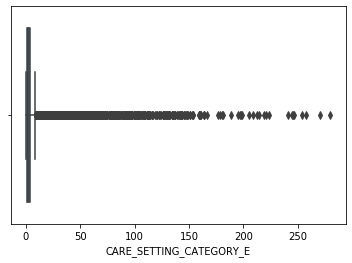

In [90]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_E'])

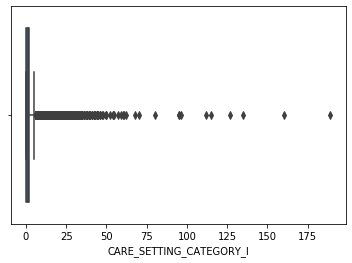

In [91]:
sns.boxplot(x=k_df['CARE_SETTING_CATEGORY_I'])

In [105]:
z1=np.abs(stats.zscore(k_df['CARE_SETTING_CATEGORY_E']))
import numpy as np
k_E=np.where(z1 > 3)
print(k_E[0])

[    34     83    400 ... 413461 413463 413506]


In [106]:
len(k_E[0])

6770

In [94]:
len(k_O[0])

NameError: name 'k_O' is not defined

In [95]:
z3=np.abs(stats.zscore(k_df['CARE_SETTING_CATEGORY_E']))
import numpy as np
k_E=np.where(z3 > 3)
print(k_E[0])

[    34     83    400 ... 413461 413463 413506]


In [96]:
len(k_E[0])

6770

## Explaination of DISCHARGE_DISPOSITION per care setting category

In [97]:
DISCHARGE_DISPOSITION_df= pd.read_csv(file_path, usecols=['DISCHARGE_DISPOSITION'])

In [98]:
len(DISCHARGE_DISPOSITION_df.DISCHARGE_DISPOSITION.unique())

91

#####  Percentage of Missing value

In [59]:
DISCHARGE_DISPOSITION_df.isnull().sum()*100/len(DISCHARGE_DISPOSITION_df)

DISCHARGE_DISPOSITION    56.242162
dtype: float64

##### Percentage of each category

In [65]:
df1=DISCHARGE_DISPOSITION_df['DISCHARGE_DISPOSITION'].value_counts(normalize=True)*100

In [ ]:
DISCHARGE_DISPOSITION_df= pd.read_csv(file_path, usecols=['DISCHARGE_DISPOSITION'])

In [35]:
DISCHARGE_DISPOSITION_CS_df= pd.read_csv(file_path, usecols=['CARE_SETTING_CATEGORY','DISCHARGE_DISPOSITION'])

In [49]:
DF_E=DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='E') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']!='NaN')]

In [50]:
len(DF_E)

4474888

In [54]:
DF_I=DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='I') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']!='NaN')]

In [55]:
len(DF_I)

1615511

In [56]:
DF_O=DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='O') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']!='NaN')]

In [57]:
len(DF_O)

24328691

In [37]:
DISCHARGE_DISPOSITION_CS_df.head(100)

,CARE_SETTING_CATEGORY,DISCHARGE_DISPOSITION
0,E,NaN
1,E,NaN
2,E,NaN
3,E,NaN
4,E,NaN
5,E,NaN
6,E,NaN
7,E,NaN
8,E,NaN
9,E,NaN


In [92]:
sol1=DISCHARGE_DISPOSITION_CS_df[DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept']  

In [93]:
len(sol1)

160328

In [94]:
discharge_E = DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='E') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept')]

In [95]:
len(discharge_E)

20742

In [96]:
# percent

20742*100/160328

12.937228681203532

In [97]:
discharge_I = DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='I') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept')]

In [98]:
len(discharge_I)

0

In [99]:
# percent

0*100/160328

0.0

In [100]:
discharge_O = DISCHARGE_DISPOSITION_CS_df[(DISCHARGE_DISPOSITION_CS_df['CARE_SETTING_CATEGORY']=='O') & (DISCHARGE_DISPOSITION_CS_df['DISCHARGE_DISPOSITION']=='Kept')]

In [101]:
len(discharge_O)

139586

In [102]:
# percent

139586*100/160328

87.06277131879646

In [105]:
E=[20.89297533488701,11.20100250121969,0.57824925481635,12.937228681203532]
I=[4.958978495241195,5.137854703475858,0.4335212219907065,0]
O=[74.14804616987179,83.66114279530446,98.98822952319294,87.06277131879646]

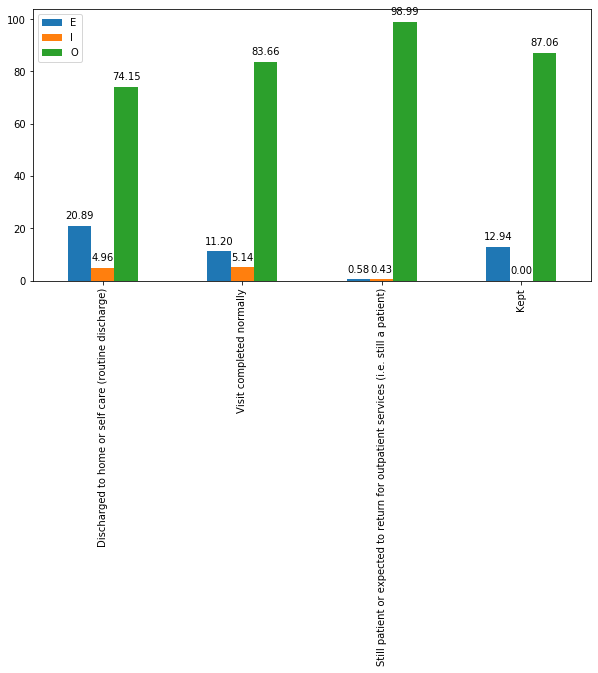

In [106]:

index=['Discharged to home or self care (routine discharge)', 'Visit completed normally', 'Still patient or expected to return for outpatient services (i.e. still a patient)','Kept']
                   
df = pd.DataFrame({'E': E,
                   'I': I,'O':O}, index=index)
ax=df.plot.bar(rot=90, figsize=(10,5))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [60]:
df1=pd.DataFrame(df1)
df1

,DISCHARGE_DISPOSITION
Discharged to home or self care (routine discharge),50.362948
Visit completed normally,41.792475
Still patient or expected to return for outpatient services (i.e. still a patient),3.400060
Kept;Visit completed normally,1.589589
Kept,1.204501
Discharged/transferred to skilled nursing facility (SNF),0.466931
Discharged/transferred to another short term general hospital for inpatient care,0.235502
Left against medical advice or discontinued care,0.218944
Discharged/transferred to home under care of organized home health service organization,0.209740
Discharged/transferred to another type of institution for inpatient care or referred for outpatient,0.110565


## Explaination of OVERDOSE_FLAG

In [66]:
OVERDOSE_FLAG_df= pd.read_csv(file_path, usecols=['OVERDOSE_FLAG'])

In [67]:
pandas_profiling.ProfileReport(OVERDOSE_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Explaination of OD_TERMS

In [102]:
OD_TERMS_df= pd.read_csv(file_path, usecols=['OD_TERMS'])

In [92]:
def new_val(each):
    each=str(each)
    
    each_list = each.split(";")
    each_list_set=set(each_list)
    if len(each_list_set)==1:
        return each_list[0]
    else:
        if '\n' in each_list_set:
            each_list=remove_values_from_list(each_list,'\n')
            return ';'.join(each_list)
            

In [93]:
OD_TERMS_df['OD_TERMS'] = OD_TERMS_df['OD_TERMS'].apply(lambda x: new_val(x))

##### Percentage of Missing value

In [103]:
OD_TERMS_df.isnull().sum()*100/len(OD_TERMS_df)

OD_TERMS    99.869365
dtype: float64

In [95]:
def s(k):
    if k=='over dose' or k=='over-dose':
        return 'overdose'
    if k in ['altered\nmental status','altered mental\nstatus','altered mental \nstatus','altered mental \n\nstatus','altered\n\nmental status']:
        return 'altered mental status'
    if k in ['poison','poisoning','poisoned']:
        return 'poison'
    else:
        return k

In [96]:
OD_TERMS_df['OD_TERMS'] = OD_TERMS_df['OD_TERMS'].apply(lambda x: s(x))

In [97]:
OD_TERMS_df['OD_TERMS'].value_counts()

nan                      30379352
overdose                    23861
altered mental status        9128
od                           2561
poison                       2091
unresponsiveness              362
snort                         212
intox                          46
nodding off                     3
loss of of                      1
Name: OD_TERMS, dtype: int64

In [98]:
df1=OD_TERMS_df['OD_TERMS'].value_counts(normalize=True)*100


In [99]:
df1=pd.DataFrame(df1)
df1

,OD_TERMS
nan,99.874201
overdose,0.078445
altered mental status,0.030009
od,0.008419
poison,0.006874
unresponsiveness,0.001190
snort,0.000697
intox,0.000151
nodding off,0.000010
loss of of,0.000003


## Explaination of OD_DRUG_TERMS

In [100]:
OD_DRUG_TERMS_df= pd.read_csv(file_path, usecols=['OD_DRUG_TERMS'])

##### Percentage of Missing value

In [104]:
OD_DRUG_TERMS_df.isnull().sum()*100/len(OD_DRUG_TERMS_df)

OD_DRUG_TERMS    99.869365
dtype: float64

In [105]:
df1=OD_DRUG_TERMS_df['OD_DRUG_TERMS'].value_counts(normalize=True)*100
df1=pd.DataFrame(df1)
df1

,OD_DRUG_TERMS
overdose,48.243495
altered mental status,19.049776
overdose;overdose,8.090493
od,5.664603
poison,3.945845
altered mental status;altered mental status,2.337813
overdose;overdose;overdose,1.935175
overdose;overdose;overdose;overdose,0.797725
unresponsiveness,0.790176
altered mental status;altered mental status;altered mental status,0.664352


In [107]:
OD_DRUG_TERMS_df['OD_DRUG_TERMS'] = OD_DRUG_TERMS_df['OD_DRUG_TERMS'].apply(lambda x: new_val(x))

In [108]:
OD_DRUG_TERMS_df['OD_DRUG_TERMS'] = OD_DRUG_TERMS_df['OD_DRUG_TERMS'].apply(lambda x: s(x))

In [111]:
df1=OD_DRUG_TERMS_df['OD_DRUG_TERMS'].value_counts(normalize=True)*100


In [112]:
df1=pd.DataFrame(df1)
df1

,OD_DRUG_TERMS
nan,99.874201
overdose,0.078445
altered mental status,0.030009
od,0.008419
poison,0.006874
unresponsiveness,0.001190
snort,0.000697
intox,0.000151
nodding off,0.000010
loss of of,0.000003


## Explaination of OD_AR_FLAG by unique patients

In [113]:
OD_AR_FLAG_df= pd.read_csv(file_path, usecols=['OD_AR_FLAG'])

In [114]:
pandas_profiling.ProfileReport(OD_AR_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [ ]:
## Explaination of ADVERSE_OPIOID_EVENT_FLAG

In [115]:
ADVERSE_OPIOID_EVENT_FLAG_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_FLAG'])

In [116]:
pandas_profiling.ProfileReport(OD_AR_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Explaination of ADVERSE_OPIOID_EVENT_FLAG

In [117]:
ADVERSE_OPIOID_EVENT_FLAG_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_FLAG'])

In [118]:
pandas_profiling.ProfileReport(ADVERSE_OPIOID_EVENT_FLAG_df)

Number of variables,1
Number of observations,30419090
Total Missing (%),99.7%
Total size in memory,232.1 MiB
Average record size in memory,8.0 B
Numeric,0
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## Explaination of ADVERSE_OPIOID_EVENT_DRUGS

In [121]:
ADVERSE_OPIOID_EVENT_DRUGS_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_DRUGS'])

In [122]:
ADVERSE_OPIOID_EVENT_DRUGS_df.isnull().sum()*100/len(ADVERSE_OPIOID_EVENT_DRUGS_df)

## update with percentage

ADVERSE_OPIOID_EVENT_DRUGS    99.707539
dtype: float64

In [ ]:
df1=OD_DRUG_TERMS_df['OD_DRUG_TERMS'].value_counts(normalize=True)*100


In [125]:
df1=ADVERSE_OPIOID_EVENT_DRUGS_df['ADVERSE_OPIOID_EVENT_DRUGS'].value_counts(normalize=True)*100
df1=pd.DataFrame(df1)
df1

,ADVERSE_OPIOID_EVENT_DRUGS
opioid,32.171440
narcotic,31.512747
opiate,20.204802
methadone,2.356009
pain medication,1.452273
hydrocodone,1.361225
polypharmacy,1.324131
percocet,1.131919
vicodin,1.065600
morphine,0.926217


## Explaination of ADVERSE_OPIOID_EVENT_DRUGS

In [126]:
ADVERSE_OPIOID_EVENT_PROBLEMS_df= pd.read_csv(file_path, usecols=['ADVERSE_OPIOID_EVENT_PROBLEMS'])

In [127]:
ADVERSE_OPIOID_EVENT_PROBLEMS_df.isnull().sum()*100/len(ADVERSE_OPIOID_EVENT_PROBLEMS_df)
## get %

ADVERSE_OPIOID_EVENT_PROBLEMS    99.707539
dtype: float64

In [134]:
def n_val(each):
    each=str(each)
    if each=='dependence' or each=='dependance' or each=='dependency':
        return 'dependence'
    if each=='drug-seeking' or each=='drug seeking':
        return 'drug seeking'
    
    each_list = each.split(";")
    each_list=sorted(each_list)
    each_list_set=set(each_list)
    if len(each_list_set)==1:
        return each_list[0]
    return each

In [135]:
ADVERSE_OPIOID_EVENT_PROBLEMS_df['ADVERSE_OPIOID_EVENT_PROBLEMS'] = ADVERSE_OPIOID_EVENT_PROBLEMS_df['ADVERSE_OPIOID_EVENT_PROBLEMS'].apply(lambda x: n_val(x))

In [136]:
df1=ADVERSE_OPIOID_EVENT_PROBLEMS_df['ADVERSE_OPIOID_EVENT_PROBLEMS'].value_counts(normalize=True)*100


In [137]:
df1=pd.DataFrame(df1)
df1

,ADVERSE_OPIOID_EVENT_PROBLEMS
nan,99.707539
dependence,0.127203
abuse,0.073043
overdose,0.034728
addiction,0.030247
dependent,0.004047
overuse,0.002212
drug seeking,0.002022
od,0.001880
misuse,0.001732


# Insurance

In [7]:
df_Insurance= pd.read_csv(file_path, usecols=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'])

In [8]:
df_Insurance.head(5)

,COMMERCIAL_FLAG,OTHERGOV_FLAG,SELFPAY_FLAG,WORKERSCOMP_FLAG,INSTITUTIONALIZED_FLAG,CHARITY_FLAG,MEDICARE_FLAG,MEDICAID_FLAG,LIFE_FLAG,MDWISE_FLAG,NODATA_FLAG
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0


In [11]:
pandas_profiling.ProfileReport(df_Insurance)

Number of variables,11
Number of observations,30419090
Total Missing (%),0.0%
Total size in memory,2.5 GiB
Average record size in memory,88.0 B
Numeric,0
Categorical,0
Boolean,11
Date,0
Text (Unique),0
Rejected,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
No = [21406244, 30285409, 29944523, 30347818, 30414380,30414990,21662850,27291646,30393404,29949190,19813311]
Yes = [9012846,133681,474567,71272,4710,4100,8756240,3127444,25686,469900,10605779]

In [4]:
for i in range(len(No)):
    No[i]=No[i]*100/30419090
    Yes[i]=Yes[i]*100/30419090

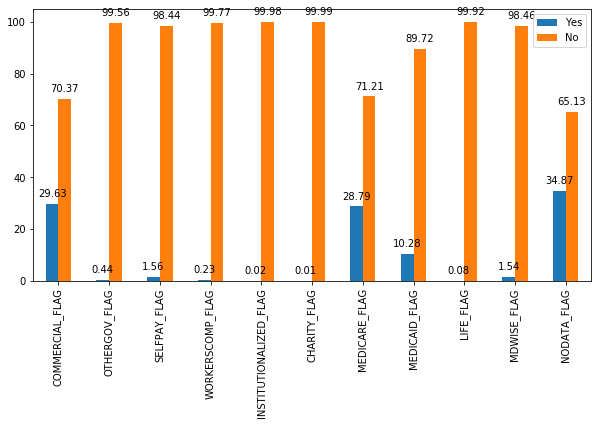

In [29]:
for i in range(len(No)):
    No[i]=No[i]*100/30419090
    Yes[i]=Yes[i]*100/30419090
index=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG','WORKERSCOMP_FLAG','INSTITUTIONALIZED_FLAG','CHARITY_FLAG',
                                                 'MEDICARE_FLAG','MEDICAID_FLAG','LIFE_FLAG','MDWISE_FLAG','NODATA_FLAG']
                   
df = pd.DataFrame({'Yes': Yes,
                   'No': No}, index=index)
ax=df.plot.bar(rot=90, figsize=(10,5))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [2]:
import pandas as pd

In [3]:
df_Insurance= pd.read_csv(file_path, usecols=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'])

NameError: name 'file_path' is not defined

##### 

In [92]:
sum_row = df_Insurance.sum(axis=1)

In [86]:
sum_row.unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [96]:
sum_row=pd.DataFrame(sum_row)

In [97]:
sum_row.head(5)

,0
0,0
1,1
2,1
3,1
4,1


In [104]:
sum_row=sum_row.rename(columns={0: "C1"})

In [106]:
df1=sum_row['C1'].value_counts()
df1=pd.DataFrame(df1)
df1

,C1
1,25011510
2,3427926
0,1706720
3,272873
4,61


In [105]:
df1=sum_row['C1'].value_counts(normalize=True)*100
df1=pd.DataFrame(df1)
df1

,C1
1,82.223071
2,11.268996
0,5.610687
3,0.897045
4,0.000201


##### Having all the insurance

In [4]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==0) & (df_Insurance['OTHERGOV_FLAG']==0) &
                  (df_Insurance['SELFPAY_FLAG']==0)
                 & (df_Insurance['WORKERSCOMP_FLAG']==0) & (df_Insurance['INSTITUTIONALIZED_FLAG']==0)& (df_Insurance['CHARITY_FLAG']==0)
                  & (df_Insurance['MEDICARE_FLAG']==0)& (df_Insurance['MEDICAID_FLAG']==0)
                  & (df_Insurance['LIFE_FLAG']==0) & (df_Insurance['MDWISE_FLAG']==0) & (df_Insurance['NODATA_FLAG']==1)]

NameError: name 'df_Insurance' is not defined

In [59]:
len(df)

0

In [60]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['OTHERGOV_FLAG']==1) &
                  (df_Insurance['SELFPAY_FLAG']==1)
                 & (df_Insurance['WORKERSCOMP_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)& (df_Insurance['CHARITY_FLAG']==1)
                  & (df_Insurance['MEDICARE_FLAG']==1)& (df_Insurance['MEDICAID_FLAG']==1)
                  & (df_Insurance['LIFE_FLAG']==1) & (df_Insurance['MDWISE_FLAG']==1)]
len(df)

0

In [61]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['OTHERGOV_FLAG']==1) &
                  (df_Insurance['SELFPAY_FLAG']==1)
                 & (df_Insurance['WORKERSCOMP_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)& (df_Insurance['CHARITY_FLAG']==1)
                  & (df_Insurance['MEDICARE_FLAG']==1)& (df_Insurance['MEDICAID_FLAG']==1)
                  & (df_Insurance['LIFE_FLAG']==1)]
len(df)

0

##### Number of Visits with COMMERCIAL_FLAG and INSTITUTIONALIZED_FLAG

In [37]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)]

In [38]:
len(df)

7

##### Number of Visits with COMMERCIAL_FLAG and MEDICARE_FLAG

In [44]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['MEDICARE_FLAG']==1)]


In [45]:
len(df)

944019

##### Number of Visits with COMMERCIAL_FLAG and MDWISE_FLAG

In [46]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['MDWISE_FLAG']==1)]
len(df)

23046

#### Number of Visits with COMMERCIAL_FLAG and LIFE_FLAG

In [47]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['LIFE_FLAG']==1)]
len(df)

5519

##### Number of Visits with COMMERCIAL_FLAG and MEDICAID_FLAG

In [48]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['MEDICAID_FLAG']==1)]
len(df)

708976

##### Number of Visits with COMMERCIAL_FLAG and WORKERSCOMP_FLAG

In [52]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['WORKERSCOMP_FLAG']==1)]
len(df)

61

##### Number of Visits with COMMERCIAL_FLAG and OTHERGOV_FLAG

In [53]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['OTHERGOV_FLAG']==1)]
len(df)

195

##### Number of Visits with COMMERCIAL_FLAG and SELFPAY_FLAG

In [55]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['SELFPAY_FLAG']==1)]
len(df)

915

In [ ]:
df_Insurance= pd.read_csv(file_path, usecols=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG'])

##### Number of Visits with MEDICARE_FLAG and MEDICAID_FLAG

In [62]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['MEDICAID_FLAG']==1)]
len(df)

24655

##### Number of Visits with MEDICARE_FLAG and MDWISE_FLAG

In [63]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['MDWISE_FLAG']==1)]
len(df)

66

##### Number of Visits with MEDICARE_FLAG and LIFE_FLAG

In [64]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['LIFE_FLAG']==1)]
len(df)

641

##### Number of Visits with MEDICARE_FLAG and SELFPAY_FLAG

In [66]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['SELFPAY_FLAG']==1)]
len(df)

297

##### Number of Visits with MEDICARE_FLAG and INSTITUTIONALIZED_FLAG

In [67]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)]
len(df)

0

##### Number of Visits with MEDICARE_FLAG and WORKERSCOMP_FLAG

In [70]:
df = df_Insurance[(df_Insurance['MEDICARE_FLAG']==1) & (df_Insurance['WORKERSCOMP_FLAG']==1)]
len(df)

12

##### Number of Visits with MEDICARE_FLAG and CHARITY_FLAG

In [71]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['CHARITY_FLAG']==1)]
len(df)

0

##### Number of Visits with MEDICAID_FLAG and SELFPAY_FLAG

In [72]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['SELFPAY_FLAG']==1)]
len(df)

1136

##### Number of Visits with MEDICAID_FLAG and INSTITUTIONALIZED_FLAG

In [73]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['INSTITUTIONALIZED_FLAG']==1)]
len(df)

17

##### Number of Visits with MEDICAID_FLAG and WORKERSCOMP_FLAG

In [74]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['WORKERSCOMP_FLAG']==1)]
len(df)

233

##### Number of Visits with MEDICAID_FLAG and CHARITY_FLAG

In [75]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['CHARITY_FLAG']==1)]
len(df)

3

##### Number of Visits with MEDICAID_FLAG and NODATA_FLAG

In [76]:
df = df_Insurance[(df_Insurance['MEDICAID_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

358142

In [ ]:
'COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG']

##### Number of Visits with COMMERCIAL_FLAG and NODATA_FLAG

In [78]:
df = df_Insurance[(df_Insurance['COMMERCIAL_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

959616

##### Number of Visits with SELFPAY_FLAG and NODATA_FLAG

In [79]:
df = df_Insurance[(df_Insurance['SELFPAY_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

21649

##### Number of Visits with WORKERSCOMP_FLAG and NODATA_FLAG

In [80]:
df = df_Insurance[(df_Insurance['WORKERSCOMP_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

6716

##### Number of Visits with INSTITUTIONALIZED_FLAG and NODATA_FLAG

In [81]:
df = df_Insurance[(df_Insurance['INSTITUTIONALIZED_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

236

##### Number of Visits with CHARITY_FLAG and NODATA_FLAG

In [82]:
df = df_Insurance[(df_Insurance['CHARITY_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

92

##### Number of Visits with LIFE_FLAG and NODATA_FLAG

In [83]:
df = df_Insurance[(df_Insurance['LIFE_FLAG']==1) & (df_Insurance['NODATA_FLAG']==1)]
len(df)

3218

##### Number of Visits with LIFE_FLAG and CHARITY_FLAG

In [84]:
df = df_Insurance[(df_Insurance['LIFE_FLAG']==1) & (df_Insurance['CHARITY_FLAG']==1)]
len(df)

0

In [107]:
arr=['COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG',
       'INSTITUTIONALIZED_FLAG', 'CHARITY_FLAG', 'MEDICARE_FLAG',
       'MEDICAID_FLAG', 'LIFE_FLAG', 'MDWISE_FLAG', 'NODATA_FLAG']

##### Combination of 3 flags

In [123]:
from itertools import combinations 
  
k=list(combinations(arr, 3)) 


In [124]:
k

[('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'SELFPAY_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'WORKERSCOMP_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'INSTITUTIONALIZED_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'CHARITY_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'MEDICARE_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'MEDICAID_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'LIFE_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'MDWISE_FLAG'),
 ('COMMERCIAL_FLAG', 'OTHERGOV_FLAG', 'NODATA_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'WORKERSCOMP_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'INSTITUTIONALIZED_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'CHARITY_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'MEDICARE_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'MEDICAID_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'LIFE_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'MDWISE_FLAG'),
 ('COMMERCIAL_FLAG', 'SELFPAY_FLAG', 'NODATA_FLAG'),
 ('COMMERCIAL_FLAG', 'WORKERSCOMP_FLAG', 'INSTITUTI

In [126]:
for i,j,m in k[:10]:
    
    print(i,j,m)
    df = df_Insurance[(df_Insurance[i]==1) & (df_Insurance[j]==1) & (df_Insurance[m]==1)]
    print(len(df))

COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG INSTITUTIONALIZED_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG MEDICARE_FLAG
5
COMMERCIAL_FLAG OTHERGOV_FLAG MEDICAID_FLAG
14
COMMERCIAL_FLAG OTHERGOV_FLAG LIFE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG MDWISE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG NODATA_FLAG
83
COMMERCIAL_FLAG SELFPAY_FLAG WORKERSCOMP_FLAG
0


In [127]:
from itertools import combinations 
  
k_4=list(combinations(arr, 4)) 


In [130]:
len(k_4)

330

In [129]:
for a,b,c,d in k_4[:60]:
    
    print(a,b,c,d)
    df = df_Insurance[(df_Insurance[a]==1) & (df_Insurance[b]==1) & (df_Insurance[c]==1) & (df_Insurance[d]==1)]
    print(len(df))

COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG WORKERSCOMP_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG INSTITUTIONALIZED_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG MEDICARE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG MEDICAID_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG LIFE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG MDWISE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG SELFPAY_FLAG NODATA_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG INSTITUTIONALIZED_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG MEDICARE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG MEDICAID_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG LIFE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG MDWISE_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG WORKERSCOMP_FLAG NODATA_FLAG
0
COMMERCIAL_FLAG OTHERGOV_FLAG INSTITUTIONALIZED_FLAG CHARITY_FLAG
0
COMMERCIAL_FLAG 